# RNA Energy Barriers Exploration

This notebook explores the implementation of RNA structure manipulation and path finding algorithms.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from rna_structure import RNAStructure
from path_finding import find_direct_path

## 1. Testing Basic RNA Structure Operations

In [3]:
# Create a simple RNA structure
sequence = "GGGAAACCC"
structure = "(((...)))"

rna = RNAStructure(sequence, structure)
print(f"Sequence: {sequence}")
print(f"Structure: {structure}")
print(f"Base pairs: {rna.base_pairs}")

Sequence: GGGAAACCC
Structure: (((...)))
Base pairs: {(1, 7), (2, 6), (0, 8)}


## 2. Testing Structure Manipulation

In [4]:
# Test adding and removing base pairs
rna2 = RNAStructure(sequence)
print("Initial structure:", rna2.to_dotbracket())

rna2.add_pair(0, 8)
print("After adding (0,8):", rna2.to_dotbracket())

rna2.add_pair(1, 7)
print("After adding (1,7):", rna2.to_dotbracket())

rna2.remove_pair(0, 8)
print("After removing (0,8):", rna2.to_dotbracket())

Initial structure: .........
After adding (0,8): (.......)
After adding (1,7): ((.....))
After removing (0,8): .(.....).


## 3. Testing Path Finding

In [5]:
# Define start and end structures
sequence = "GGGGAAACCCC"
start_struct = "((((...))))"
end_struct = "...((....))"  # A different valid structure

start = RNAStructure(sequence, start_struct)
end = RNAStructure(sequence, end_struct)

# Find direct path
direct_path = find_direct_path(start, end)
print("Direct path:")
for i, struct in enumerate(direct_path):
    print(f"Step {i}: {struct.to_dotbracket()}")

Direct path:
Step 0: ((((...))))
Step 1: (((.....)))
Step 2: (.(.....).)
Step 3: ..(.....)..
Step 4: ...........
Step 5: ...........
Step 6: ...(......)


## 4. Analyzing Energy Barriers

For now, we're using a simple energy model (negative number of base pairs). Later we'll integrate with ViennaRNA for more accurate energy calculations.

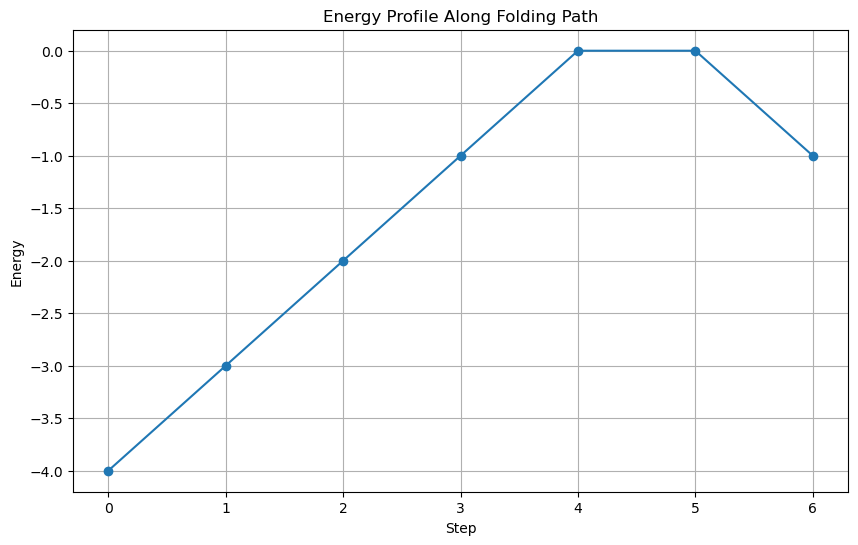

Direct path barrier: 4


In [6]:
def plot_energy_profile(path, energy_function=lambda s: -len(s.base_pairs)):    
    energies = [energy_function(s) for s in path]
    plt.figure(figsize=(10, 6))
    plt.plot(energies, '-o')
    plt.xlabel('Step')
    plt.ylabel('Energy')
    plt.title('Energy Profile Along Folding Path')
    plt.grid(True)
    plt.show()
    
    return max(energies) - energies[0]  # barrier height

print("Direct path barrier:", plot_energy_profile(direct_path))